<a href="https://colab.research.google.com/github/harshavardhangadila/Basic-Neural-Network-Using-Numpy-Keras-Pytorch-and-Jax/blob/main/3)_PyTorch_From_Scratch_(Manual_Layers%2C_No_nn_Module).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### PyTorch From Scratch - 3-Layer Neural Network for Nonlinear Regression (No nn.Module)

In [1]:
# 1. Imports
import numpy as np
import torch
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
torch.manual_seed(42)
np.random.seed(42)


In [3]:
# 2. Generate 3-Variable Synthetic Nonlinear Data
def generate_data(n_samples=1000):
    x1 = np.random.uniform(-5, 5, n_samples)
    x2 = np.random.uniform(-5, 5, n_samples)
    x3 = np.random.uniform(-5, 5, n_samples)
    y = 2 * np.sin(x1) + 0.5 * x2**2 + 0.3 * x3**3 + np.cos(x1 * x2)
    y += np.random.normal(0, 0.2, n_samples)  # Add noise
    X = np.column_stack([x1, x2, x3]).astype(np.float32)
    y = y.astype(np.float32).reshape(-1, 1)
    return torch.tensor(X), torch.tensor(y)

X_train, y_train = generate_data()

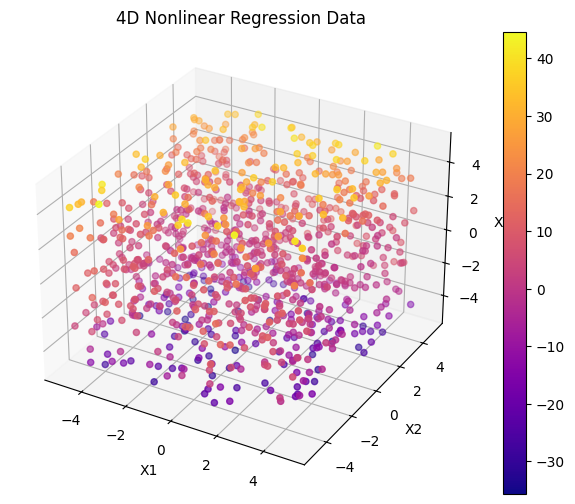

In [4]:
# 3. Visualize 4D Data (color = y)
def plot_4d(X, y):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    sc = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y.squeeze(), cmap='plasma')
    plt.colorbar(sc)
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("X3")
    ax.set_title("4D Nonlinear Regression Data")
    plt.show()

plot_4d(X_train, y_train)

In [5]:
# 4. Activation functions
def relu(x):
    return torch.clamp(x, min=0.0)

def relu_derivative(x):
    return (x > 0).float()


In [6]:
# 5. Initialize Parameters (3-layer NN)
def init_weights():
    W1 = torch.randn(3, 64) * np.sqrt(2. / 3)
    b1 = torch.zeros(1, 64)
    W2 = torch.randn(64, 32) * np.sqrt(2. / 64)
    b2 = torch.zeros(1, 32)
    W3 = torch.randn(32, 1) * np.sqrt(2. / 32)
    b3 = torch.zeros(1, 1)
    return [W1.requires_grad_(), b1.requires_grad_(),
            W2.requires_grad_(), b2.requires_grad_(),
            W3.requires_grad_(), b3.requires_grad_()]

W1, b1, W2, b2, W3, b3 = init_weights()

In [7]:
# 6. Training Loop
lr = 0.01
epochs = 1000
losses = []

for epoch in range(epochs):
    # Forward
    Z1 = X_train @ W1 + b1
    A1 = relu(Z1)
    Z2 = A1 @ W2 + b2
    A2 = relu(Z2)
    y_pred = A2 @ W3 + b3

    # Loss
    loss = torch.mean((y_pred - y_train) ** 2)
    losses.append(loss.item())

    # Backprop
    loss.backward()

    with torch.no_grad():
        for param in [W1, b1, W2, b2, W3, b3]:
            param -= lr * param.grad
            param.grad.zero_()

    if epoch % 100 == 0 or epoch < 5:
        print(f"Epoch {epoch:4d} | Loss: {loss.item():.5f}")

Epoch    0 | Loss: 296.54810
Epoch    1 | Loss: 489.90308
Epoch    2 | Loss: 3824.00098
Epoch    3 | Loss: 235.43542
Epoch    4 | Loss: 222.64957
Epoch  100 | Loss: 144.71039
Epoch  200 | Loss: 123.45155
Epoch  300 | Loss: 146.45372
Epoch  400 | Loss: 53.04155
Epoch  500 | Loss: 43.09262
Epoch  600 | Loss: 42.91325
Epoch  700 | Loss: 31.73899
Epoch  800 | Loss: 35.35313
Epoch  900 | Loss: 33.15333


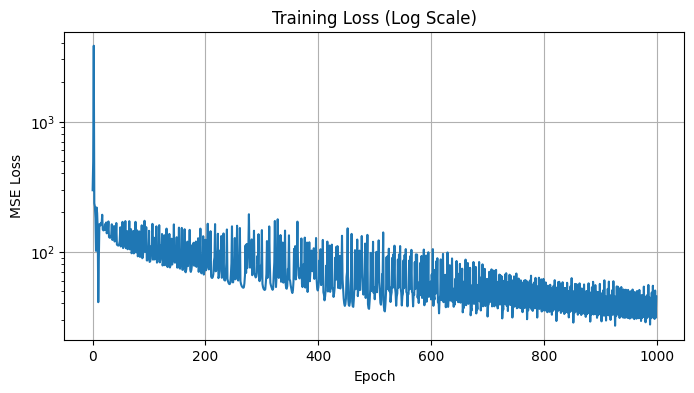

In [8]:
# 7. Plot Loss Curve
plt.figure(figsize=(8, 4))
plt.semilogy(losses)
plt.title("Training Loss (Log Scale)")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.show()


In [9]:
# 8. Final Prediction on Training Data
with torch.no_grad():
    Z1 = X_train @ W1 + b1
    A1 = relu(Z1)
    Z2 = A1 @ W2 + b2
    A2 = relu(Z2)
    y_pred_train = A2 @ W3 + b3

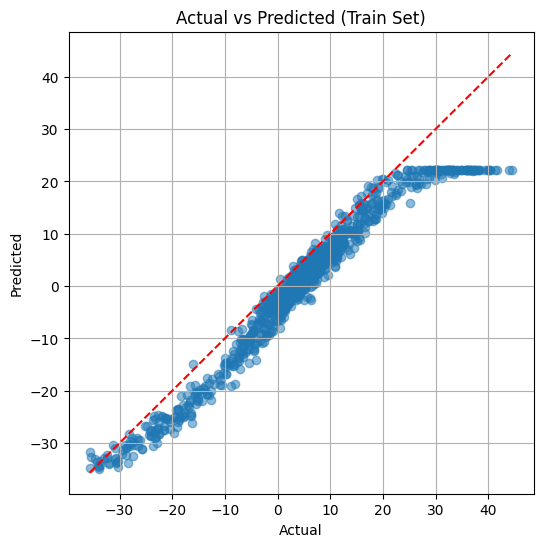

In [10]:
# 9. Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_train.numpy(), y_pred_train.numpy(), alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted (Train Set)")
plt.grid(True)
plt.show()

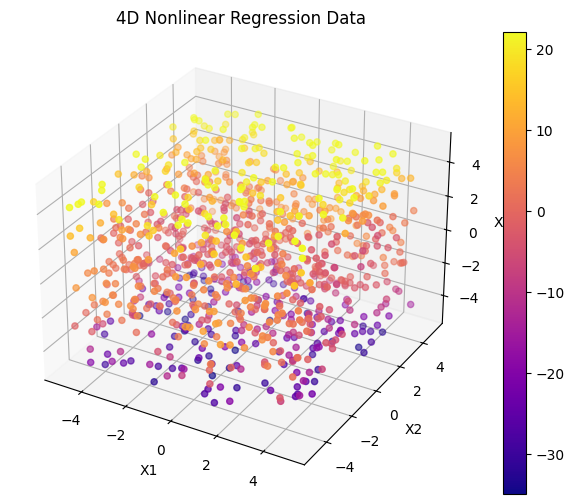

In [11]:
# 10. 4D Prediction Visualization
plot_4d(X_train, y_pred_train)